# Introduction to pandas

This is a pandas tutorial with the case of titanic.
We will start with: 

Pandas tutorial:
1. Looking through the data
2. Exploring the variables
3. Cleaning the data
4. Transforming the data
5. Analysing the data
6. An automated way to find rules of classifications with Decision Tree (BONUS)

Looking through the data
1. Sample the data with head and tail
2. Describe the data for a quick overview
3. Selecting columns
4. Grouping the data
5. Plotting the data

 
Interesting Question - Is it possible to predict the survival of the titanic passengers from the profile of the passengers? 

Exploring the variables - From here we should ask ourselves these questions
1. What variables do i need? - What profile characteristics about the passengers may affect survival? 
2. Should I transform any variables?
3. Are there NA Values, Outliers or Other Strange Values?
4. Should I Create New Variables?

Cleaning the data
1. Checking for data abnormalities
2. Handle missing values
3. Remove columns which are not used

Transforming the data
1. Transform variables into much more readable forms
2. Group feature for comparisons
3. Generate features that might help us analyse more

Analysing the data
From the data let us try to find:
1. The spread of age group
2. The proportion of survivor with family
3. The proportion of male/female with certain socioeconomic status that survive, given that they are adult
4. The proportion of embarked port to survival

## Dataset Explanation
VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.

# Looking through the data

1. Sample the data with head and tail
2. Describe the data for a quick overview
3. Selecting columns
4. Grouping the data
5. Plotting the data

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline


maindf = pd.read_csv('dataset/Titanic/train.csv')

In [6]:
maindf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
maindf.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
maindf.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
maindf.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Giles, Mr. Frederick Edward",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


From the describes. We can find out the mean and the distribution of the variables. Describe without the object represents numerical values whereas if you put object type, it represents categorical.
From here we can find out:
1. Most of the people
2. Most of the passengers bought the tickets for relatively lower price, but some of them. Oddly bought it pretty high. Possibly because they are from VIPs


In [10]:
maindf.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Exploring the variables
## From here we can look at the following questions:

1. How many survive in the dataset?
2. How many survive depending on the gender?

## How many survive in the dataset?

In [11]:
conditionsurvive = (maindf.Survived==1)

In [12]:
maindf.loc[[0,1,2],['PassengerId','Survived','Pclass']]

,PassengerId,Survived,Pclass
0,1,0,3
1,2,1,1
2,3,1,3


In [13]:
# Finding survive
maindf.loc[conditionsurvive,:].shape

(342, 12)

In [14]:
# Finding non survive
maindf.loc[~conditionsurvive,:].shape

(549, 12)

In [15]:
# Or anotther way is to group them by survived
maindf.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [16]:
maindf.groupby('Survived').count().Name

Survived
0    549
1    342
Name: Name, dtype: int64

##### There are 342 survived and 549 non survived

## How many survive in the dataset?

In [17]:
# Let's now group the data to find if most of them are male or female
maindf.groupby(['Survived','Sex']).count().Name

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Name, dtype: int64

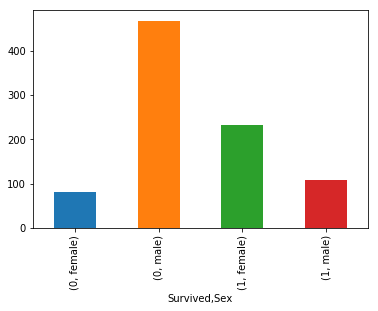

In [18]:
# Let's plot them out and see the result
maindf.groupby(['Survived','Sex']).count().Name.plot(kind='bar')

In [19]:
survivedsex = maindf.groupby(['Survived','Sex']).count().Name.reset_index()
maindfsurvivedis0 = survivedsex.loc[(survivedsex.Survived==0),:]
maindfsurvivedis1 = survivedsex.loc[(survivedsex.Survived==1),:]

In [20]:
maindfsurvivedis0

,Survived,Sex,Name
0,0,female,81
1,0,male,468


### There are 342 survived and 549 non survived
##### Out of those survived (233 are female, 109 are male ) whereas non survived ( 81 are female, 468 are male)


## Cleaning the data

1. Checking for data abnormalities
2. Handle missing values
3. Remove columns which are not used

In [21]:
maindf.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [22]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### There are missing data on the age(numerical). We need to clean that up.

In [23]:
# Replace null in age with the average
maindf['Age'] = maindf.loc[:,['Age']].fillna(maindf['Age'].mean())

In [24]:
# Describing columns for analysis
# Drop useless columns such as passengerid ,name, (ticket, fare) can be described by socioeconomic status, and cabin (too much null)
cleandf = maindf.loc[:,['Survived','Pclass','Sex','Age','SibSp','Parch','Embarked']]

# Transforming the data

1. Transform variables into much more readable forms
2. Group feature for comparisons
3. Generate features that might help us analyse more

In [25]:
# We can transform Pclass and Embarked
# 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower
cleandf['socioeconomicstatus']=cleandf.Pclass.map({1:'upper',2:'middle',3:'lower'})

In [26]:
# (C = Cherbourg; Q = Queenstown; S = Southampton)
cleandf['embarkedport']=cleandf.Embarked.map({'C':'Cherbourg','Q':'Queenstown','S':'Southampton'})

In [27]:
# Dropping the used columns
cleandf.drop(['Pclass','Embarked'],axis=1,inplace=True)

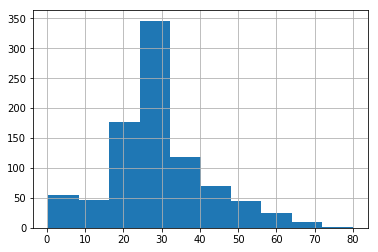

In [28]:
# Group age for comparisons
cleandf.Age.hist()

In [29]:
# Let us try to separate this into ages
agesplit = [0,10,18,25,40,90]
agestatus = ['Adolescent','Teenager','Young Adult','Adult','Elder']

cleandf['agegroup']=pd.cut(cleandf.Age,agesplit,labels=agestatus)

In [30]:
# Create a feature where we count both numbers of siblings and parents
cleandf['familymembers']=cleandf.SibSp+cleandf.Parch

In [31]:
# Let us try to find whether the passengers are alone or not
hasfamily = (cleandf.familymembers>0)*1
cleandf['hasfamily'] = hasfamily

In [32]:
# Dropping the used columns
cleandf.drop(['SibSp','Parch','Age'],axis=1,inplace=True)

In [33]:
# Final transformed data
cleandf.head()

,Survived,Sex,socioeconomicstatus,embarkedport,agegroup,familymembers,hasfamily
0,0,male,lower,Southampton,Young Adult,1,1
1,1,female,upper,Cherbourg,Adult,1,1
2,1,female,lower,Southampton,Adult,0,0
3,1,female,upper,Southampton,Adult,1,1
4,0,male,lower,Southampton,Adult,0,0


In [34]:
cleandf.to_csv('cleanedandtransformedtitanicdata.csv')

# Analysing the data

From the data let us try to find out what profile characteristics of the passengers are related to their survival

1. The spread of age group
2. The proportion of survivor with family members
3. The proportion of male/female with certain socioeconomic status that survive, given that they are adult
4. The proportion of embarked port to survival

In [35]:
# Reading from csv
cleandf = pd.read_csv('cleanedandtransformedtitanicdata.csv')

## The spread of age group

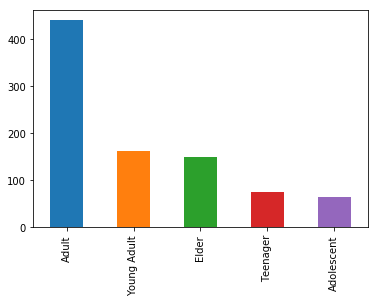

In [36]:
cleandf.agegroup.value_counts().plot(kind='bar')

## The proportion of survivor with family

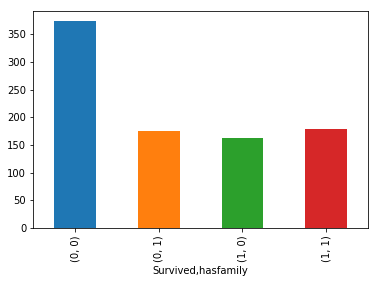

In [37]:
# The proportion of survivor with family
cleandf.groupby(['Survived','hasfamily']).count().agegroup.plot(kind='bar')

In [38]:
survived = pd.crosstab(index=cleandf.Survived, columns = cleandf.socioeconomicstatus,margins=True)
survived.columns = ['lower','middle','upper','rowtotal']
survived.index = ['died','survived','coltotal']

In [39]:
survived

,lower,middle,upper,rowtotal
died,372,97,80,549
survived,119,87,136,342
coltotal,491,184,216,891


In [40]:
survived/survived.ix['coltotal','rowtotal']

C:\new_software\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,lower,middle,upper,rowtotal
died,0.417508,0.108866,0.089787,0.616162
survived,0.133558,0.097643,0.152637,0.383838
coltotal,0.551066,0.206510,0.242424,1.000000


In [41]:
# Most of the lower class died, middle have same chances of survival, and upper are morelikely to survive

## The proportion of embarked port to survival


In [42]:
cleandf.groupby(['Survived','embarkedport']).count().agegroup

Survived  embarkedport
0         Cherbourg        75
          Queenstown       47
          Southampton     427
1         Cherbourg        93
          Queenstown       30
          Southampton     217
Name: agegroup, dtype: int64

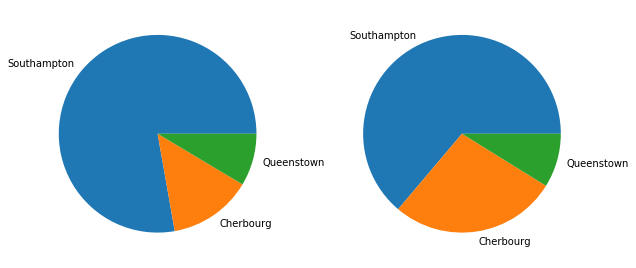

In [43]:
# create a figure with two subplots
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

notsurvivors = cleandf[cleandf.Survived==0].embarkedport.value_counts()
survivors= cleandf[cleandf.Survived==1].embarkedport.value_counts()


# plot each pie chart in a separate subplot
ax1.pie(notsurvivors,labels=notsurvivors.index);
ax2.pie(survivors,labels=survivors.index);

##  The proportion of male/female with certain socioeconomic status that survive, given that they are adult


lower     491
upper     216
middle    184
Name: socioeconomicstatus, dtype: int64


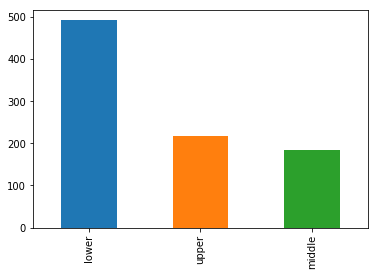

In [44]:
print(cleandf.socioeconomicstatus.value_counts())
cleandf.socioeconomicstatus.value_counts().plot(kind='bar')

In [45]:
isadult = cleandf.agegroup=='Adult'
issurvived = cleandf.Survived==1
isnotsurvived = cleandf.Survived==0

all = cleandf[isadult].groupby(['Sex','socioeconomicstatus']).count().Survived
survived = cleandf[isadult&issurvived].groupby(['Sex','socioeconomicstatus']).count().Survived
notsurvived = cleandf[isadult&isnotsurvived].groupby(['Sex','socioeconomicstatus']).count().Survived

In [46]:
survivedcrosstab = pd.crosstab(index=cleandf.Survived, columns = cleandf.socioeconomicstatus,margins=True)
survivedcrosstab.columns = ['lower','middle','upper','rowtotal']
survivedcrosstab.index = ['died','survived','coltotal']

In [47]:
survivedcrosstab

,lower,middle,upper,rowtotal
died,372,97,80,549
survived,119,87,136,342
coltotal,491,184,216,891


In [48]:
survivedcrosstab/survivedcrosstab.ix['coltotal','rowtotal']

C:\new_software\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,lower,middle,upper,rowtotal
died,0.417508,0.108866,0.089787,0.616162
survived,0.133558,0.097643,0.152637,0.383838
coltotal,0.551066,0.206510,0.242424,1.000000


## Running a chi square analysis

In [57]:
from scipy import stats

chi2_stat, p_val, dof, ex = stats.chi2_contingency(survivedcrosstab)
print("===Chi2 Stat===")
print(chi2_stat)
print("\n")
print("===Degrees of Freedom===")
print(dof)
print("\n")
print("===P-Value===")
print(p_val)
print("\n")
print("===Contingency Table===")
print(ex)

===Chi2 Stat===
102.88898875696057


===Degrees of Freedom===
6


===P-Value===
6.258462423531468e-20


===Contingency Table===
[[302.53535354 113.37373737 133.09090909 549.        ]
 [188.46464646  70.62626263  82.90909091 342.        ]
 [491.         184.         216.         891.        ]]


## How about if we pair Sex and SES together?

In [49]:
survivedcrosstabsex = pd.crosstab(index=cleandf.Survived, columns = [cleandf['socioeconomicstatus'],cleandf['Sex']],margins=True)


In [50]:
survivedcrosstabsex

socioeconomicstatus  lower      middle       upper       All
Sex                 female male female male female male     
Survived                                                    
0                       72  300      6   91      3   77  549
1                       72   47     70   17     91   45  342
All                    144  347     76  108     94  122  891

In [58]:
chi2_stat, p_val, dof, ex = stats.chi2_contingency(survivedcrosstabsex)
print("===Chi2 Stat===")
print(chi2_stat)
print("\n")
print("===Degrees of Freedom===")
print(dof)
print("\n")
print("===P-Value===")
print(p_val)
print("\n")
print("===Contingency Table===")
print(ex)

===Chi2 Stat===
350.67530839575556


===Degrees of Freedom===
12


===P-Value===
1.0104378593511836e-67


===Contingency Table===
[[ 88.72727273 213.80808081  46.82828283  66.54545455  57.91919192
   75.17171717 549.        ]
 [ 55.27272727 133.19191919  29.17171717  41.45454545  36.08080808
   46.82828283 342.        ]
 [144.         347.          76.         108.          94.
  122.         891.        ]]


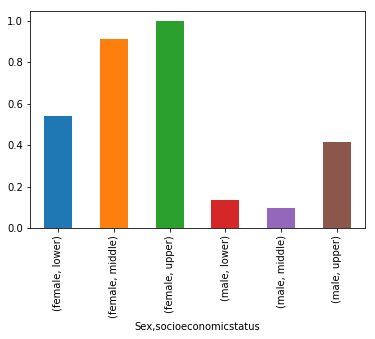

In [51]:
# Probability of survival
(survived/all).plot(kind='bar')

#### Upper class femailes survived more than males regardless of socioeconomic status. In general, upper class and female genders are the one benefited the most. Probably because the priorities on female and children in upper class passengers first

## An automated way to find rules of classifications with Decision Tree (BONUS)

In [52]:
#dropping left and sales X for the df, y for the left
X = cleandf.drop(['Survived'],axis=1)
y = cleandf['Survived']

In [53]:
# Clean up x by getting the dummies
X=pd.get_dummies(X)

In [54]:
import numpy as np
from sklearn import preprocessing,cross_validation,neighbors,svm
#splitting the train and test sets
X_train, X_test, y_train,y_test= cross_validation.train_test_split(X,y,test_size=0.2)

ImportError: cannot import name 'cross_validation' from 'sklearn' (C:\new_software\Anaconda\lib\site-packages\sklearn\__init__.py)

In [59]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier(max_depth=3)
clftree.fit(X_train,y_train)

NameError: name 'X_train' is not defined

In [ ]:
# Visualizing the decision tree
from sklearn import tree
from scipy import misc
import pydotplus
import graphviz

def show_tree(decisionTree, file_path):
    tree.export_graphviz(decisionTree, out_file='tree.dot',feature_names=X_train.columns)
    graph = pydotplus.graphviz.graph_from_dot_file('tree.dot')
    graph.write_png('tree.png')
    i = misc.imread(file_path)
    
    fig, ax = plt.subplots(figsize=(18, 10))    
    ax.imshow(i, aspect='auto')

# To use it
show_tree(clftree, 'tree.png')

In [ ]:
# Finding the accuracy of decision tree

from sklearn.metrics import accuracy_score, log_loss

print('****Results****')
train_predictions = clftree.predict(X_test)
acc = accuracy_score(y_test, train_predictions)
print("Accuracy: {:.4%}".format(acc))

## Conclusion:
1. Gender plays a very important roles, female has the most likelihood of surviving.
2. The higher Socioeconomic status, the more likelihood of surviving (especially for female)
3. Adolescent has higher chances of surviving as long as he/she does not have low socioeconomic status